In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
""" 
here i will give some path of the 
- train data 
- test data 
i install them from kaggle , i want to merge them 
to start the data exploration , eda , preprocessing , feature enginering 

--> so first merge them for me 
and diplay the firt 5 lines of it 
"""
train_path = "data/train.csv"
test_path = "data/test.csv"

# Read the train and test datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Merge the datasets
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Display the first 5 lines
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
"""

--> now i want to get information about the size , shape of the data set ? 

--> give me the commend to do this task 

# To get information about the size and shape of the dataset:
print("Dataset shape:", dataset.shape)
print("Dataset size:", dataset.size)

"""

df.shape

(505207, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [5]:
from typing import Iterable

def percentage_null(col: Iterable) -> float:
    total_observations = len(col)
    number_of_null_values = sum(1 for value in col if pd.isna(value))
    return (number_of_null_values / total_observations) if number_of_null_values else 0.0

null_percentages = df.apply(lambda col: percentage_null(col))
for col, percentage in null_percentages.items():
    print(f"Column '{col}' has {percentage:.2%} null values.")

Column 'CustomerID' has 0.00% null values.
Column 'Age' has 0.00% null values.
Column 'Gender' has 0.00% null values.
Column 'Tenure' has 0.00% null values.
Column 'Usage Frequency' has 0.00% null values.
Column 'Support Calls' has 0.00% null values.
Column 'Payment Delay' has 0.00% null values.
Column 'Subscription Type' has 0.00% null values.
Column 'Contract Length' has 0.00% null values.
Column 'Total Spend' has 0.00% null values.
Column 'Last Interaction' has 0.00% null values.
Column 'Churn' has 0.00% null values.


In [6]:
def classify_columns(dataframe):
        numerical = []
        categorical = []
    
        for column in dataframe.columns:
            if dataframe[column].dtype in ['int64', 'float64']:
                numerical.append(column)
            else:
                categorical.append(column)
    
        return numerical, categorical

# Example usage:
numerical_columns, categorical_columns = classify_columns(df)
numerical_columns, categorical_columns


(['CustomerID',
  'Age',
  'Tenure',
  'Usage Frequency',
  'Support Calls',
  'Payment Delay',
  'Total Spend',
  'Last Interaction',
  'Churn'],
 ['Gender', 'Subscription Type', 'Contract Length'])

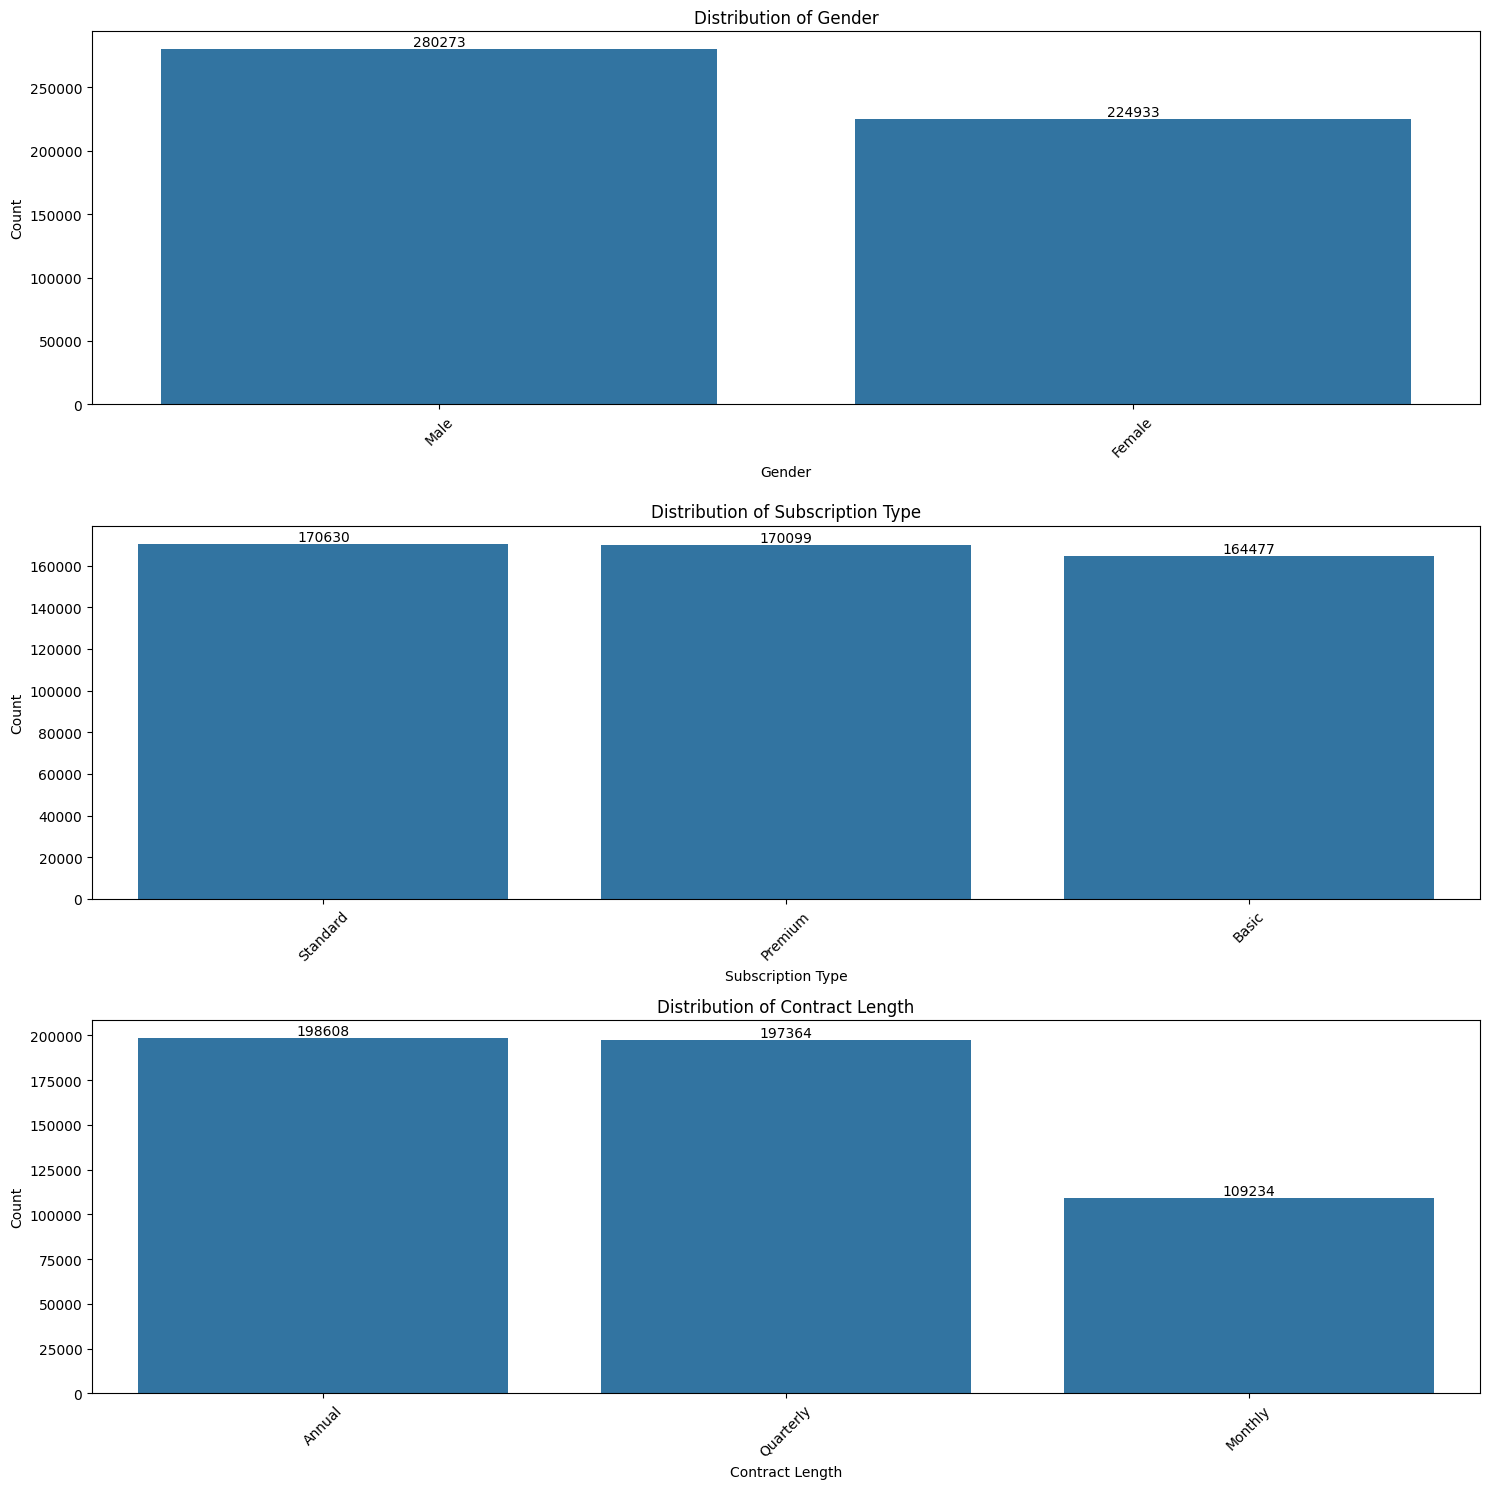

In [7]:
""" 
now i have developed a function to get the Categorical Features in the working Data Set 
the result of the function is like this 
['Gender', 'Subscription Type', 'Contract Length']

Q-my first question what is the best function or graph to show all the "Gender" ,"Subscription Type" and "Contract length"  classes 



"""

import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_features(df, categorical_columns, figsize=(15, 5*len(categorical_columns))):
    """
    Create bar plots for each categorical feature in the dataframe.
    
    Args:
    df (pandas.DataFrame): The dataframe containing the data.
    categorical_columns (list): List of column names of categorical features.
    figsize (tuple): Figure size for the entire plot (width, height).
    
    Returns:
    None. Displays the plots.
    """
    plt.figure(figsize=figsize)
    
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(len(categorical_columns), 1, i)
        
        # Count the occurrences of each category
        value_counts = df[column].value_counts()
        
        # Create a bar plot
        sns.barplot(x=value_counts.index, y=value_counts.values)
        
        # Customize the plot
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        # Add value labels on top of each bar
        for j, v in enumerate(value_counts.values):
            plt.text(j, v, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Example usage:
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
plot_categorical_features(df, categorical_columns)

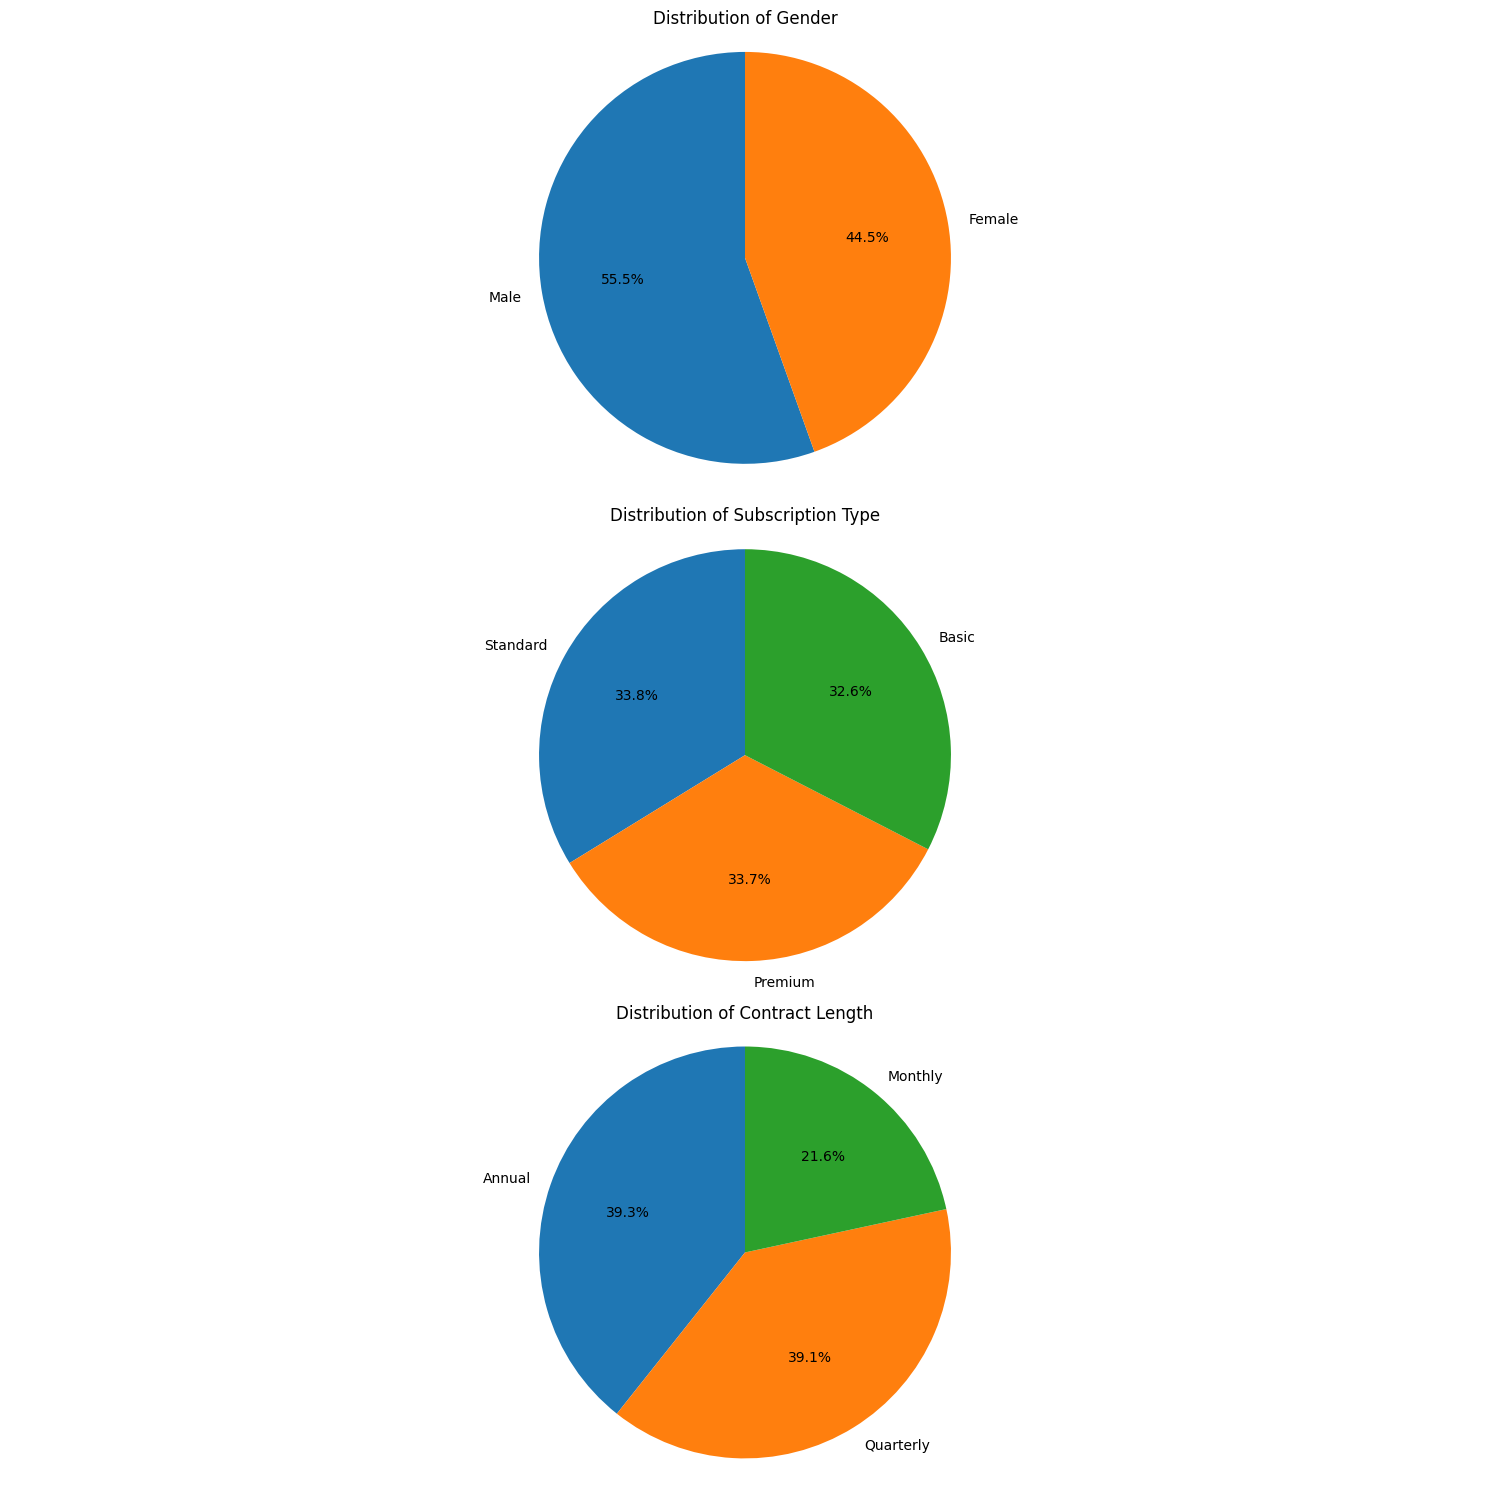

In [8]:
import matplotlib.pyplot as plt

def plot_categorical_features_pie(df, categorical_columns, figsize=(15, 5*len(categorical_columns))):
    """
    Create pie charts for each categorical feature in the dataframe.
    
    Args:
    df (pandas.DataFrame): The dataframe containing the data.
    categorical_columns (list): List of column names of categorical features.
    figsize (tuple): Figure size for the entire plot (width, height).
    
    Returns:
    None. Displays the plots.
    """
    plt.figure(figsize=figsize)
    
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(len(categorical_columns), 1, i)
        
        # Count the occurrences of each category
        value_counts = df[column].value_counts()
        
        # Create a pie chart
        plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        
        # Customize the plot
        plt.title(f'Distribution of {column}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    plt.tight_layout()
    plt.show()

# Example usage:
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
plot_categorical_features_pie(df, categorical_columns)

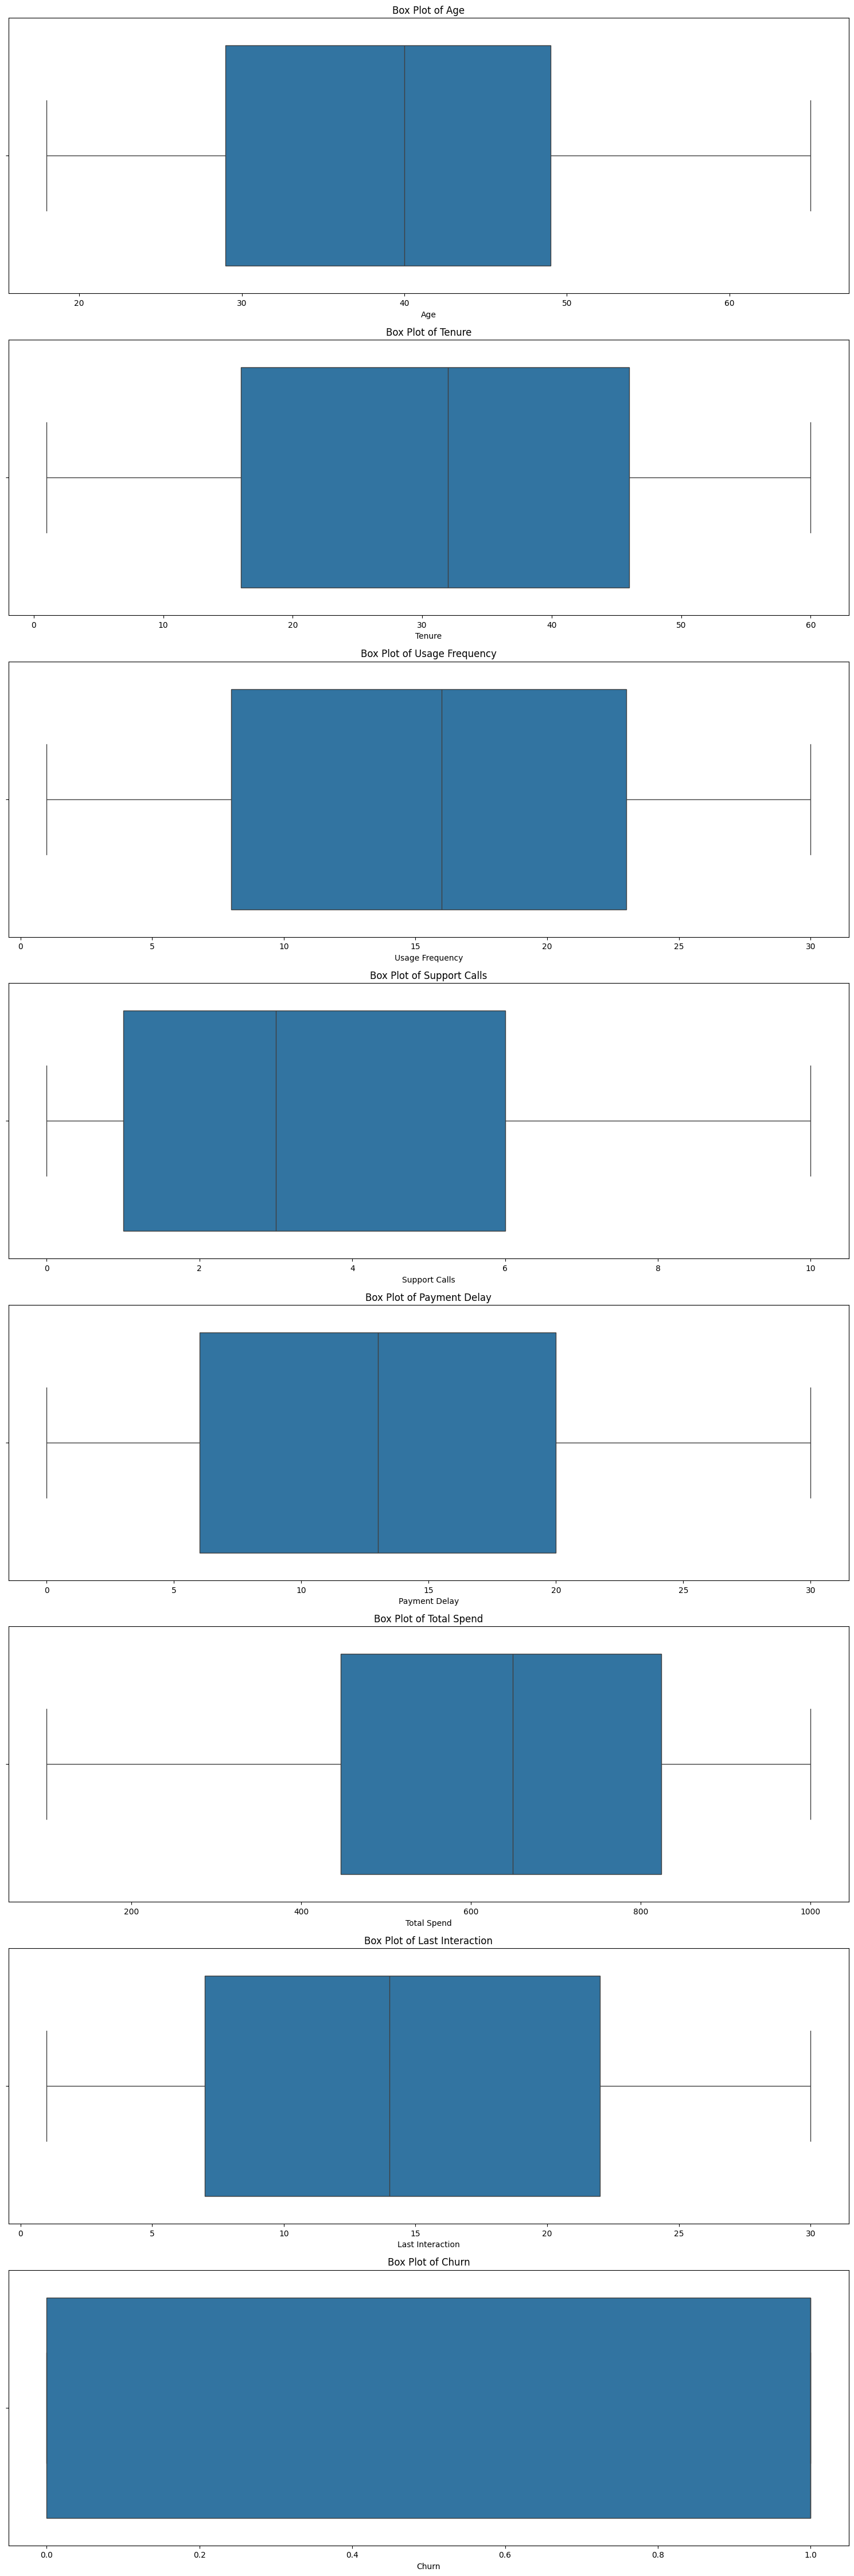

In [9]:
""" 
Q- Box Plots for Numerical Features 

A- Box plots are execellent for visualizing the distribution of numerical features and identifying 
outliers , They can help you undertand the spread , median and qualtiles of the data 



"""
def plot_box_plots(df,numerical_columns,figsize=(15,5*len(numerical_columns))):
    """ 
    Create box plots for each numerical feature in the dataFrame 

    Args: 
    df (pandas.DataFrame) : The dataframe containing the data 
    numerical_columns (list) : List of column names of numerical features 
    figsize(tuple) : Figure size for the entire plot (width , height)

    Returns: 
    None. Displays the plots 
    
    """
    plt.figure(figsize=figsize)
    for i , column in enumerate(numerical_columns,1):
        plt.subplot(len(numerical_columns),1,i)
        # Create a box plot 
        sns.boxplot(x=df[column])
        # Customize the plot 
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
    plt.tight_layout()
    plt.show()
# Example usage:
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
plot_box_plots(df, numerical_columns)

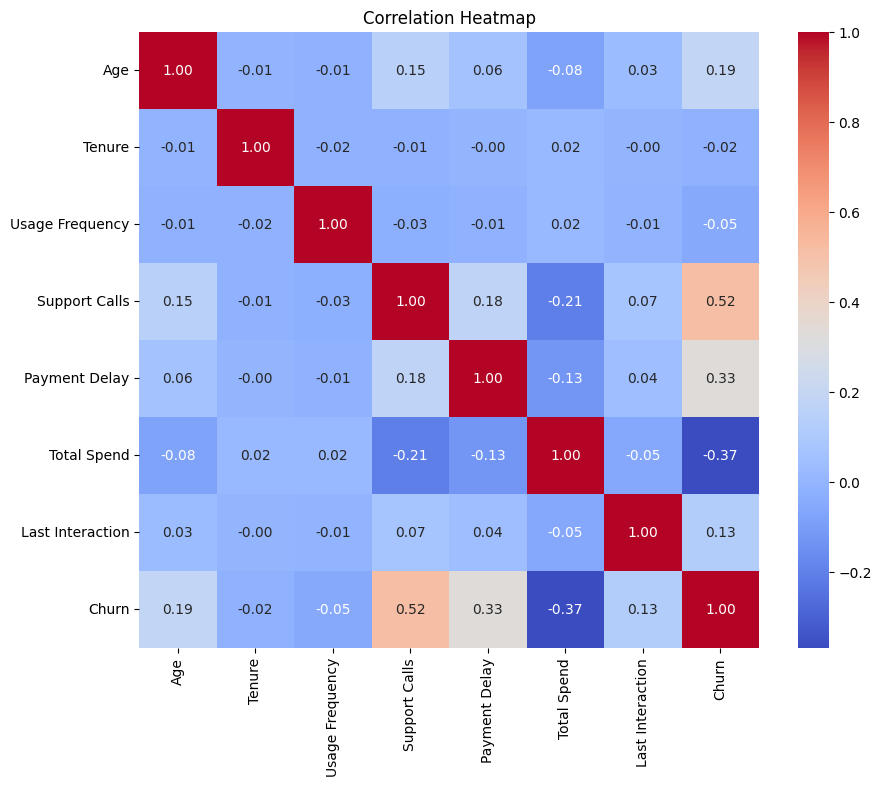

In [10]:
"""
Q- Correlation Heatmap 

Why: A correlation heatmap helps visualize the relationships between numerical features, it can 
identify which features are strongly correlated with each other, which is useful for feature selection 
and understanding multicollinearity 

""" 
def plot_correlation_heatmap(df, numerical_columns, figsize=(10,8)):
    """
    Create a correlation heatmap for numerical features in the dataframe 

    Args: 
        df (pandas.DataFrame): The dataframe containing the data 
        numerical_columns (list): List of column names of numerical features 
        figsize (tuple): Figure size for the entire plot (width, height)

    Returns: 
        None. Displays the plot 

    """
    plt.figure(figsize=figsize)
    # Calculate the correlation matrix 
    corr = df[numerical_columns].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    # Customize the plot 
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df, numerical_columns)

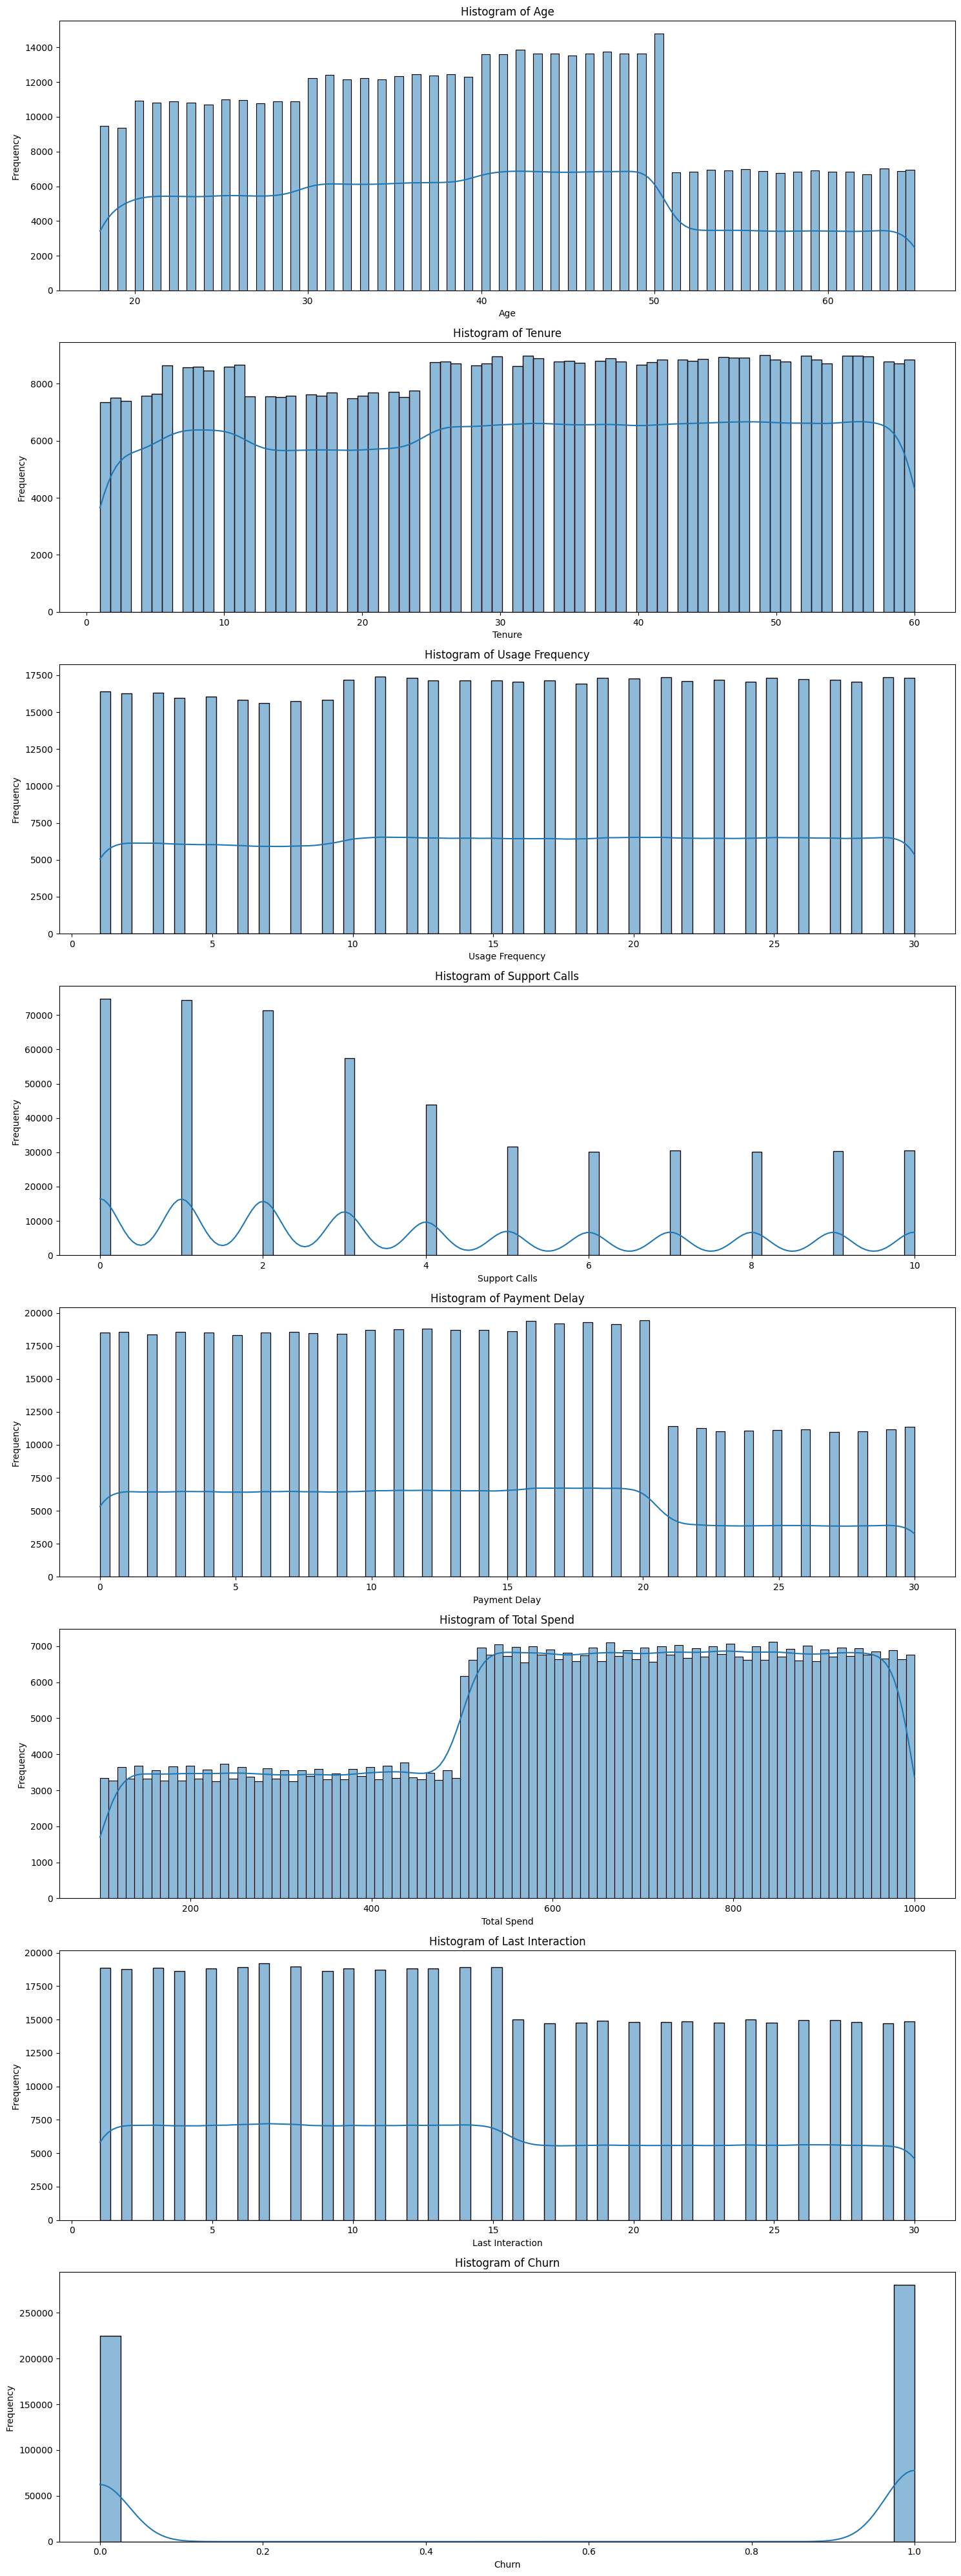

In [12]:
""" 
Q- density functions 

A- it help identify the distribution of the numercial feature and infer theire shape
*bill curve 
*right & left skwed 

"""
def plot_histograms(df,numerical_columns,figsize=(15,5*len(numerical_columns))):
    """
    Create histograms for each numerical feature in the DataFrame 
    Args: 
    df(pandas.DataFrame) : The DataFrame containing the data 
    numercal_columns (list) : List of columns names of numerical feautres 
    figsize (tuple) : Figure size for the entire plot (width  height)

    Returns: 
    None. Displays the plots 
    """
    plt.figure(figsize=figsize)
    for i  , column in enumerate(numerical_columns,1):
        plt.subplot(len(numerical_columns),1,i)
        #Create a histogram 
        sns.histplot(df[column],kde=True)
        #Customize the plot 
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency ')
    plt.tight_layout()
    plt.show()
# Example usage:
plot_histograms(df, numerical_columns) 